In [4]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable


In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.7 MB/s  0:00:01
   ---------------------------------------- 0.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 7.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.9 MB 6.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 8.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/9.9 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 9.8 MB/s  0:00:01

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



In [10]:
df = pd.read_csv("event_attendees_data.csv")
df.head()


,Attendee_ID,Registration_Date,First_Name,Last_Name,Email,Phone_Number,Age,Gender,Location_City,Location_Country,...,Feedback_Rating,Special_Requests,Ticket_Purchase_Date,Payment_Method,Ticket_Price,Registration_Source,Attendance_History,Event_Frequency,Engagement_Score,Follow_Up_Status
0,ATT_0001,2024-05-25,Scott,Watkins,svelez@example.com,721-903-3402x52693,28.0,Male,Sydney,Australia,...,1,NaN,2024-03-16,PayPal,136.42,Website,['Event 3'],Rarely,86,Pending
1,ATT_0002,2021-04-11,Michael,Wright,masonkenneth@example.com,231.277.7015x132,58.0,Other,Leeds,UK,...,5,Foot personal fall.,2024-06-30,Bank Transfer,197.26,Website,"['Event 4', 'Event 10']",Rarely,10,Pending
2,ATT_0003,2021-08-19,Elizabeth,Taylor,kylie83@example.com,449-690-9031,40.0,Other,Chengdu,China,...,5,Sense Republican.,2024-05-13,PayPal,104.38,Website,"['Event 3', 'Event 5']",Occasionally,66,Pending
3,ATT_0004,2024-02-14,Robin,Cole,zjones@example.net,+1-535-410-8978x9498,33.0,Male,Phoenix,USA,...,5,Image accept team.,2024-01-06,Bank Transfer,167.64,Social Media,"['Event 5', 'Event 8', 'Event 8', 'Event 2']",Occasionally,75,Completed
4,ATT_0005,2022-09-21,John,Lopez,smithnicholas@example.net,001-786-936-7882x501,70.0,Other,Cologne,Germany,...,3,Middle community.,2024-04-24,Credit Card,61.74,Website,"['Event 1', 'Event 3', 'Event 5', 'Event 2', '...",Rarely,32,Completed


In [11]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157509 entries, 0 to 157508
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Attendee_ID            157509 non-null  object 
 1   Registration_Date      157509 non-null  object 
 2   First_Name             157509 non-null  object 
 3   Last_Name              157509 non-null  object 
 4   Email                  157509 non-null  object 
 5   Phone_Number           157509 non-null  object 
 6   Age                    141813 non-null  float64
 7   Gender                 157509 non-null  object 
 8   Location_City          157509 non-null  object 
 9   Location_Country       157509 non-null  object 
 10  Event_Type             157509 non-null  object 
 11  Event_Date             157509 non-null  object 
 12  Attendance_Status      157509 non-null  object 
 13  Session_Attended       157509 non-null  object 
 14  Interests              157509 non-nu

In [20]:
# print("\nMissing values:\n", df.isnull().sum())
print("Missing values: ", df.isnull().sum())

Missing values:  Attendee_ID              0
Registration_Date        0
First_Name               0
Last_Name                0
Email                    0
Phone_Number             0
Age                      0
Gender                   0
Location_City            0
Location_Country         0
Event_Type               0
Event_Date               0
Attendance_Status        0
Session_Attended         0
Interests                0
Professional_Industry    0
Organization             0
Job_Title                0
Years_of_Experience      0
Preferred_Event_Type     0
Feedback_Rating          0
Special_Requests         0
Ticket_Purchase_Date     0
Payment_Method           0
Ticket_Price             0
Registration_Source      0
Attendance_History       0
Event_Frequency          0
Engagement_Score         0
Follow_Up_Status         0
dtype: int64


In [23]:
df.describe(include = "all")

,Attendee_ID,Registration_Date,First_Name,Last_Name,Email,Phone_Number,Age,Gender,Location_City,Location_Country,...,Feedback_Rating,Special_Requests,Ticket_Purchase_Date,Payment_Method,Ticket_Price,Registration_Source,Attendance_History,Event_Frequency,Engagement_Score,Follow_Up_Status
count,157509,157509,157509,157509,157509,157509,157509.000000,157509,157509,157509,...,157509.000000,157509,157509,157509,157509.000000,157509,157509,157509,157509.000000,157509
unique,150000,1699,690,1000,121820,149999,NaN,3,45,9,...,NaN,131559,238,3,NaN,3,36584,3,NaN,3
top,ATT_2244,2021-12-07,Michael,Smith,vsmith@example.net,001-351-790-5196x6380,NaN,Male,Guangzhou,France,...,NaN,Responsibility.,2024-04-24,PayPal,NaN,Social Media,['Event 2'],Frequently,NaN,Not Applicable
freq,6,127,3629,3508,21,6,NaN,52762,3657,17672,...,NaN,15630,723,52909,NaN,52707,3252,52640,NaN,52727
mean,NaN,NaN,NaN,NaN,NaN,NaN,44.020297,NaN,NaN,NaN,...,3.001308,NaN,NaN,NaN,275.025440,NaN,NaN,NaN,50.355377,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,14.512384,NaN,NaN,NaN,...,1.414033,NaN,NaN,NaN,129.861778,NaN,NaN,NaN,28.897460,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,163.080000,NaN,NaN,NaN,25.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,274.690000,NaN,NaN,NaN,50.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,...,4.000000,NaN,NaN,NaN,387.600000,NaN,NaN,NaN,75.000000,NaN


In [15]:
# Handle missing values
# Numeric: fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])


In [16]:
# Categorical: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [26]:
# Encode categorical features [label encoder]
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


In [27]:
#Feature Engineering
if len(num_cols) >= 2:
    df["num_feature_ratio"] = df[num_cols[0]] / (df[num_cols[1]] + 1)
else:
    df["num_feature_ratio"] = 0


In [36]:
df.head()

,Attendee_ID,Registration_Date,First_Name,Last_Name,Email,Phone_Number,Age,Gender,Location_City,Location_Country,...,Special_Requests,Ticket_Purchase_Date,Payment_Method,Ticket_Price,Registration_Source,Attendance_History,Event_Frequency,Engagement_Score,Follow_Up_Status,num_feature_ratio
0,0,1606,580,949,104782,124999,28.0,1,39,0,...,94382,75,2,136.42,2,14599,2,86.0,2,1.272727
1,1,466,482,986,71669,81045,58.0,2,19,7,...,42448,181,0,197.26,2,15333,2,10.0,2,2.071429
2,2,596,218,894,63803,100576,40.0,2,7,2,...,99267,133,2,104.38,2,13097,1,66.0,2,2.500000
3,3,1505,558,186,121327,40127,33.0,1,36,8,...,53283,5,0,167.64,1,21557,1,75.0,0,2.062500
4,4,994,341,539,101606,71754,70.0,2,10,4,...,67501,114,1,61.74,2,1297,2,32.0,0,2.121212


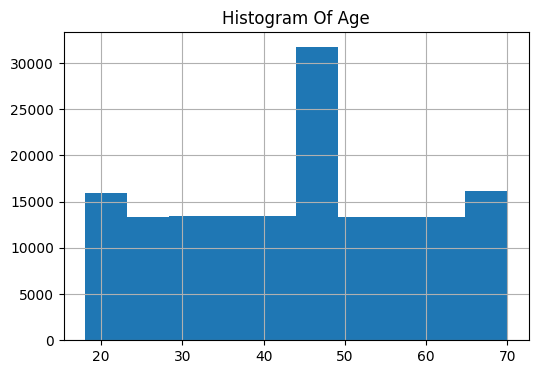

In [32]:
# 7. EDA VISUALIZATIONS
plt.figure(figsize=(6,4))
df[num_cols[0]].hist()
plt.title("Histogram Of " + num_cols[0])
plt.show()




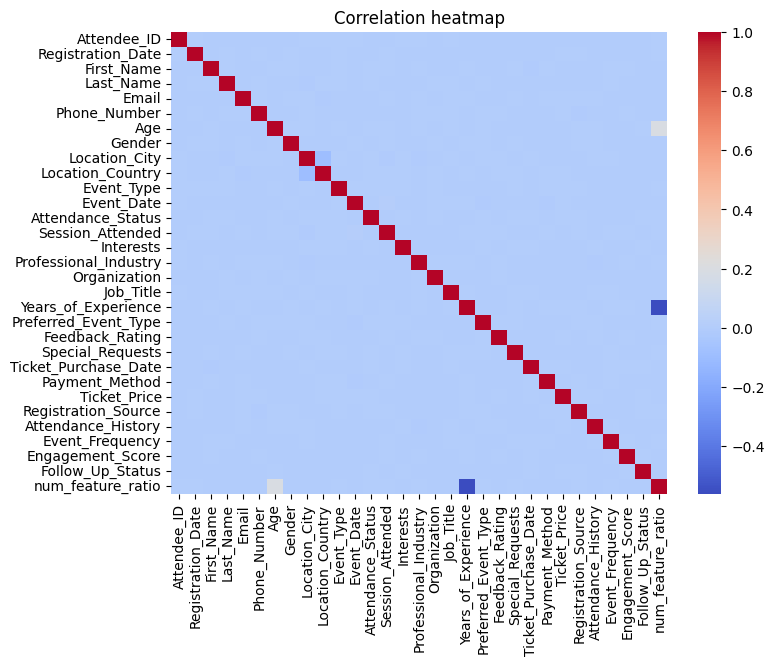

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation heatmap")
plt.show()



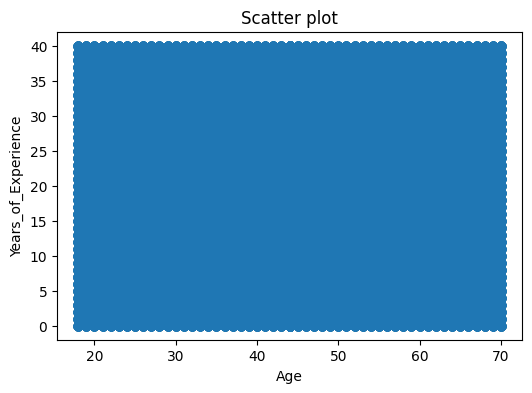

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(df[num_cols[0]], df[num_cols[1]])
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title("Scatter plot")
plt.show()

In [48]:
# Create train-test split
target = df.columns[-1]

X = df.drop("Follow_Up_Status", axis=1)
y = df["Follow_Up_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
# model 1: logistic regressionb

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred, average='weighted')

print("Logistic Regression Accuracy:", log_acc)
print("Logistic Regression F1 Score:", log_f1)


Logistic Regression Accuracy: 0.33337565868833724
Logistic Regression F1 Score: 0.3275153339301709


C:\Users\Destiny\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# model 2: random forest

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.37953145832010665
Random Forest F1 Score: 0.3790353566103157


In [57]:
# compare result
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc],
    "F1 Score": [log_f1, rf_f1]
})

results


,Model,Accuracy,F1 Score
0,Logistic Regression,0.333376,0.327515
1,Random Forest,0.379531,0.379035


In [58]:
# select best model

if rf_f1 > log_f1:
    print("Best Model: Random Forest classfier")
    best_model = "Random Forest"
else:
    print("Best Model: Logistic Regression")
    best_model = "Logistic Regression"



Best Model: Random Forest classfier
